# **DATA PREPROCESSING**

In [ ]:
# KẾT NỐI DRIVE VÀ IMPORT THƯ VIỆN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

# Tắt các cảnh báo (warnings) để output sạch hơn
warnings.filterwarnings('ignore')

# Kết nối với Google Drive
try:
    drive.mount('/content/drive')
    print("\n--- Đã kết nối Google Drive thành công! ---")
except Exception as e:
    print(f"--- Lỗi khi kết nối Google Drive: {e} ---")

# Cài đặt chung cho các biểu đồ
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Kích thước biểu đồ
plt.rcParams['font.size'] = 12 # Cỡ chữ

print("--- Đã tải xong thư viện. Sẵn sàng cho Khối 2. ---")

Mounted at /content/drive

--- Đã kết nối Google Drive thành công! ---
--- Đã tải xong thư viện. Sẵn sàng cho Khối 2. ---


In [ ]:
# 2: TẢI VÀ CHUẨN HÓA 3 FILE

print("--- Bắt đầu Khối 2: Tải và Chuẩn hóa 3 file ---")

# --- 2.1 Định nghĩa đường dẫn file ---

path_file1 = '/content/drive/My Drive/BI_Ubisoft_Data/Cleaned Data 2.csv'

path_file2 = '/content/drive/My Drive/BI_Ubisoft_Data/vgsales.csv (1).zip/vgsales.csv'

path_file3 = '/content/drive/My Drive/BI_Ubisoft_Data/vgchartz-2024.csv'



# --- 2.2 Hàm trợ giúp để đọc file an toàn ---
def load_file(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f"Tải thành công: {filepath}")
        return df
    except FileNotFoundError:
        print(f"LỖI: Không tìm thấy file tại {filepath}. Sẽ bỏ qua file này.")
        return None # Trả về None nếu không tìm thấy
    except Exception as e:
        print(f"LỖI khi đọc {filepath}: {e}. Sẽ bỏ qua file này.")
        return None

# --- 2.3 Tải và Chuẩn hóa File 1 (Cleaned Data 2.csv) ---
df1 = load_file(path_file1)
if df1 is not None:
    # Đổi tên cột cho nhất quán
    df1 = df1.rename(columns={
        'Year_of_Release': 'Year'
    })
    # Lọc Ubisoft
    mask_pub1 = df1['Publisher'].str.contains("Ubisoft", case=False, na=False)
    mask_dev1 = df1['Developer'].str.contains("Ubisoft", case=False, na=False)
    df1_ubisoft = df1[mask_pub1 | mask_dev1].copy()
    print(f"File 1: Tìm thấy {len(df1_ubisoft)} game Ubisoft.")

# --- 2.4 Tải và Chuẩn hóa File 2 (vgsales.csv) ---
df2 = load_file(path_file2)
if df2 is not None:
    # File này không có Developer, Critic_Score, User_Score
    df2['Developer'] = np.nan
    df2['Critic_Score'] = np.nan
    df2['User_Score'] = np.nan
    # Lọc Ubisoft
    mask_pub2 = df2['Publisher'].str.contains("Ubisoft", case=False, na=False)
    df2_ubisoft = df2[mask_pub2].copy()
    print(f"File 2: Tìm thấy {len(df2_ubisoft)} game Ubisoft.")

# --- 2.5 Tải và Chuẩn hóa File 3 (vgchartz-2024.csv) ---
df3 = load_file(path_file3)
if df3 is not None:
    # Đổi tên cột
    df3 = df3.rename(columns={
        'title': 'Name',
        'console': 'Platform',
        'publisher': 'Publisher',
        'developer': 'Developer',
        'total_sales': 'Global_Sales',
        'critic_score': 'Critic_Score',
    })
    # Tạo cột 'Year' từ 'release_date'
    df3['Year'] = pd.to_datetime(df3['release_date'], errors='coerce').dt.year
    df3['User_Score'] = np.nan # Thêm cột còn thiếu

    # Lọc Ubisoft
    mask_pub3 = df3['Publisher'].str.contains("Ubisoft", case=False, na=False)
    mask_dev3 = df3['Developer'].str.contains("Ubisoft", case=False, na=False)
    df3_ubisoft = df3[mask_pub3 | mask_dev3].copy()
    print(f"File 3: Tìm thấy {len(df3_ubisoft)} game Ubisoft.")

print("--- HOÀN THÀNH KHỐI 2: Đã tải và lọc Ubisoft từ các file ---")

--- Bắt đầu Khối 2: Tải và Chuẩn hóa 3 file ---
Tải thành công: /content/drive/My Drive/BI_Ubisoft_Data/Cleaned Data 2.csv
File 1: Tìm thấy 510 game Ubisoft.
LỖI khi đọc /content/drive/My Drive/BI_Ubisoft_Data/vgsales.csv (1).zip/vgsales.csv: [Errno 20] Not a directory: '/content/drive/My Drive/BI_Ubisoft_Data/vgsales.csv (1).zip/vgsales.csv'. Sẽ bỏ qua file này.
Tải thành công: /content/drive/My Drive/BI_Ubisoft_Data/vgchartz-2024.csv
File 3: Tìm thấy 1758 game Ubisoft.
--- HOÀN THÀNH KHỐI 2: Đã tải và lọc Ubisoft từ các file ---


In [ ]:
# 3: GỘP (CONCAT) VÀ LÀM SẠCH DUPLICATES

print("--- Bắt đầu Khối 3: Gộp và Làm sạch Toàn bộ Dữ liệu ---")

# Danh sách các cột chung mà chúng ta muốn giữ
# (Đây là tất cả các cột từ file 1, file "xịn" nhất)
common_columns = [
    'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Developer',
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'
]

# Tạo một danh sách các DataFrame Ubisoft đã tìm thấy
list_of_dfs = []
# Dùng 'in locals()' để kiểm tra xem biến DataFrame có tồn tại không
if 'df1_ubisoft' in locals() and df1_ubisoft is not None:
    # Chỉ lấy các cột có trong common_columns, tránh lỗi
    cols_to_keep_df1 = [col for col in df1_ubisoft.columns if col in common_columns]
    list_of_dfs.append(df1_ubisoft[cols_to_keep_df1])

if 'df2_ubisoft' in locals() and df2_ubisoft is not None:
    cols_to_keep_df2 = [col for col in df2_ubisoft.columns if col in common_columns]
    list_of_dfs.append(df2_ubisoft[cols_to_keep_df2])

if 'df3_ubisoft' in locals() and df3_ubisoft is not None:
    cols_to_keep_df3 = [col for col in df3_ubisoft.columns if col in common_columns]
    list_of_dfs.append(df3_ubisoft[cols_to_keep_df3])

# Gộp (Concat) tất cả các DataFrame lại
if not list_of_dfs:
    print("LỖI: Không có DataFrame nào để gộp. Vui lòng kiểm tra lại Khối 2.")
    # Dừng nếu không có dữ liệu
    raise ValueError("Không tìm thấy dữ liệu Ubisoft đã lọc từ Khối 2.")
else:
    df_combined = pd.concat(list_of_dfs, ignore_index=True)
    print(f"Đã gộp. Tổng số dòng (trước khi xử lý trùng lặp): {len(df_combined)}")

    # --- 3.1 Xử lý trùng lặp ---
    # Sắp xếp dữ liệu để ưu tiên:
    # 1. Ưu tiên các dòng có 'Critic_Score' (không bị NaT)
    # 2. Ưu tiên các dòng có 'Global_Sales' cao hơn (dữ liệu có thể mới hơn)
    df_combined = df_combined.sort_values(by=['Critic_Score', 'Global_Sales'], ascending=[False, False])

    # Xóa trùng lặp dựa trên 'Name' và 'Platform', giữ lại bản ghi đầu tiên (là bản tốt nhất sau khi sắp xếp)
    count_before = len(df_combined)
    df_combined.drop_duplicates(subset=['Name', 'Platform'], keep='first', inplace=True)
    count_after = len(df_combined)
    print(f"Đã xử lý trùng lặp. Xóa {count_before - count_after} dòng.")

    # --- 3.2 Làm sạch cuối cùng ---
    # Lọc bỏ các game có doanh thu = 0 hoặc NaN
    df_final = df_combined[
        (df_combined['Global_Sales'] > 0) &
        (df_combined['Global_Sales'].notna())
    ].copy()
    print(f"Đã lọc bỏ game có doanh thu = 0 hoặc NaN. Còn lại: {len(df_final)} game.")

    # Xử lý các giá trị thiếu (NaN) còn lại
    df_final['Publisher'].fillna('Ubisoft', inplace=True) # Điền 'Ubisoft' vì chúng ta đã lọc
    df_final['Developer'].fillna('Unknown', inplace=True)
    df_final['Rating'].fillna('Not Rated', inplace=True)

    # --- 3.3 Lưu file ---
    # Lưu vào thư mục gốc của My Drive
    output_path = '/content/drive/My Drive/BI_Ubisoft_Data/ubisoft_dataset_ALL_FILES_final.csv'
    df_final.to_csv(output_path, index=False)

    print(f"--- HOÀN THÀNH KHỐI 3 ---")
    print(f"Đã lưu bộ dữ liệu TỔNG HỢP và SẠCH vào file: '{output_path}'.")

    print("\n----- Thông tin (Info) của Dataset cuối cùng (df_final) -----")
    df_final.info()
    print("\n----- 5 dòng đầu (Head) của Dataset cuối cùng (df_final) -----")
    print(df_final.head())

--- Bắt đầu Khối 3: Gộp và Làm sạch Toàn bộ Dữ liệu ---
Đã gộp. Tổng số dòng (trước khi xử lý trùng lặp): 2268
Đã xử lý trùng lặp. Xóa 222 dòng.
Đã lọc bỏ game có doanh thu = 0 hoặc NaN. Còn lại: 1221 game.
--- HOÀN THÀNH KHỐI 3 ---
Đã lưu bộ dữ liệu TỔNG HỢP và SẠCH vào file: '/content/drive/My Drive/BI_Ubisoft_Data/ubisoft_dataset_ALL_FILES_final.csv'.

----- Thông tin (Info) của Dataset cuối cùng (df_final) -----
<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 457 to 1439
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1221 non-null   object 
 1   Year          1221 non-null   float64
 2   Genre         293 non-null    object 
 3   Publisher     1221 non-null   object 
 4   NA_Sales      293 non-null    float64
 5   EU_Sales      293 non-null    float64
 6   JP_Sales      293 non-null    float64
 7   Other_Sales   293 non-null    float64
 8   Global_Sales  1221 non-null   float64
 9 

Đang vẽ Biểu đồ 1: Xu hướng Doanh thu...


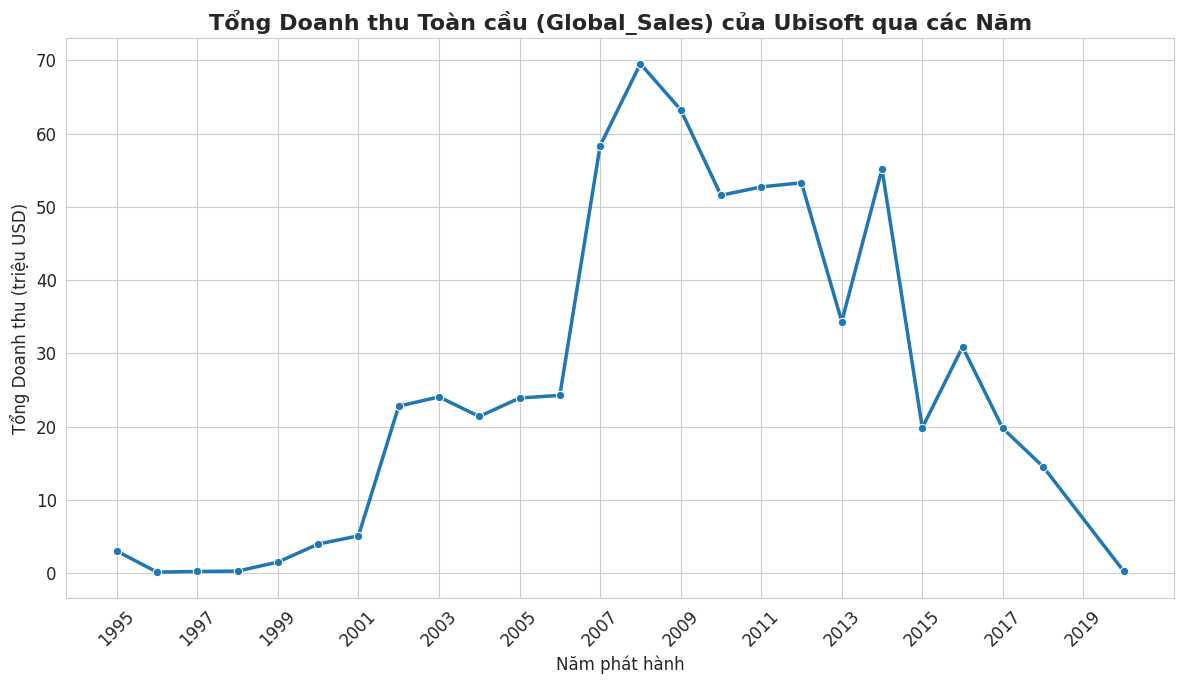

Đang vẽ Biểu đồ 2: Top 5 Thể loại...


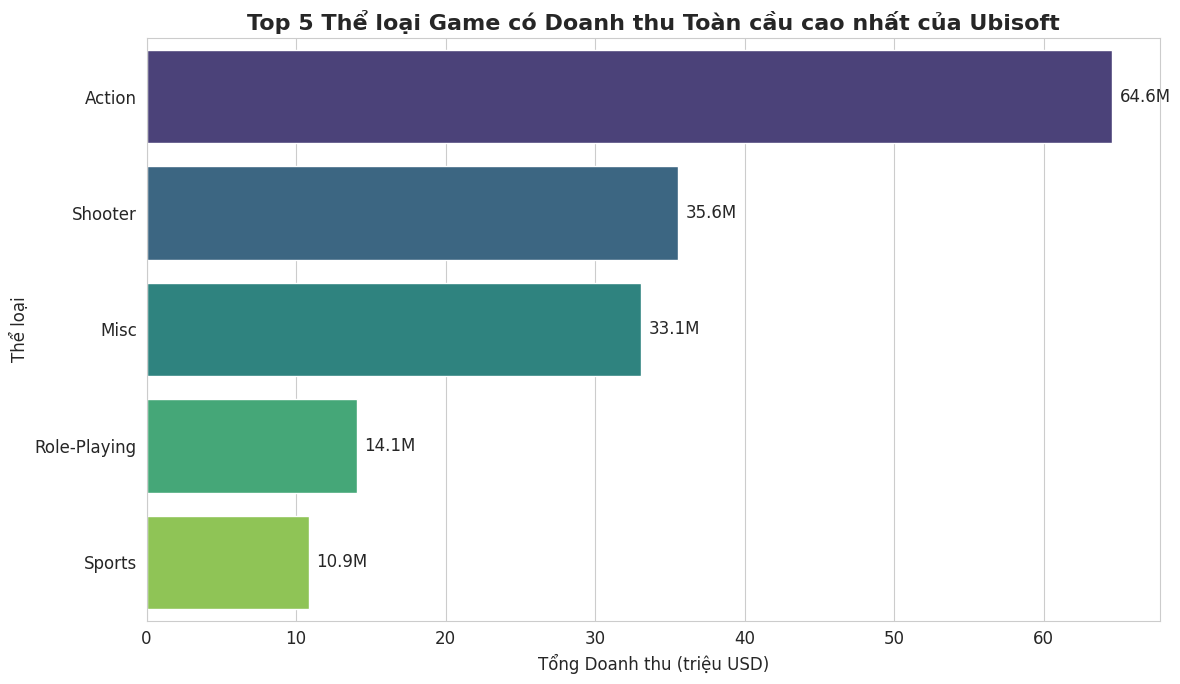

--- HOÀN THÀNH KHỐI 4 ---


In [ ]:
# 4: TRỰC QUAN HÓA (EDA)

# Kiểm tra xem df_final có tồn tại không
if 'df_final' not in locals():
    print("LỖI: Không tìm thấy DataFrame 'df_final'.")
else:
    # --- Biểu đồ 1: Xu hướng Doanh thu Toàn cầu qua các Năm ---
    print("Đang vẽ Biểu đồ 1: Xu hướng Doanh thu...")
    plt.figure()

    # CHẠY TRÊN df_final
    # Bỏ qua các dòng có 'Year' bị NaN để vẽ biểu đồ
    sales_by_year_df = df_final.dropna(subset=['Year']).copy()

    # Chuyển đổi 'Year' sang integer để biểu đồ đẹp hơn
    sales_by_year_df['Year'] = sales_by_year_df['Year'].astype(int)

    # Gom nhóm theo năm và tính tổng doanh thu
    sales_by_year_grouped = sales_by_year_df.groupby('Year')['Global_Sales'].sum().reset_index()

    ax1 = sns.lineplot(data=sales_by_year_grouped, x='Year', y='Global_Sales', marker='o', linewidth=2.5)
    ax1.set_title('Tổng Doanh thu Toàn cầu (Global_Sales) của Ubisoft qua các Năm', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Năm phát hành')
    ax1.set_ylabel('Tổng Doanh thu (triệu USD)')

    # Đặt mốc trục X là 2 năm một lần để dễ đọc
    # Chỉ làm điều này nếu có dữ liệu để tính min/max
    if not sales_by_year_grouped.empty:
        min_year = int(sales_by_year_grouped['Year'].min())
        max_year = int(sales_by_year_grouped['Year'].max())
        ax1.set_xticks(range(min_year, max_year + 1, 2))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() # Hiển thị biểu đồ

    # --- Biểu đồ 2: Top 5 Thể loại (Genre) bán chạy nhất ---
    print("Đang vẽ Biểu đồ 2: Top 5 Thể loại...")
    plt.figure()

    # Gom nhóm theo thể loại, tính tổng doanh thu và sắp xếp
    sales_by_genre = df_final.groupby('Genre')['Global_Sales'].sum().reset_index()
    top_5_genres = sales_by_genre.sort_values(by='Global_Sales', ascending=False).head(5)

    # Vẽ biểu đồ cột ngang (y='Genre') để dễ đọc tên
    ax2 = sns.barplot(data=top_5_genres, x='Global_Sales', y='Genre', palette='viridis')
    ax2.set_title('Top 5 Thể loại Game có Doanh thu Toàn cầu cao nhất của Ubisoft', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Tổng Doanh thu (triệu USD)')
    ax2.set_ylabel('Thể loại')

    # Thêm nhãn giá trị (data labels)
    for p in ax2.patches:
        width = p.get_width()
        ax2.text(width + 0.5, # Vị trí X (bên phải cột)
                 p.get_y() + p.get_height() / 2, # Vị trí Y (ở giữa cột)
                 f'{width:.1f}M', # Nội dung text, làm tròn 1 chữ số
                 va='center')

    plt.tight_layout()
    plt.show() # Hiển thị biểu đồ

    print("--- HOÀN THÀNH KHỐI 4 ---")

Đang vẽ Biểu đồ 5: Phân bổ Doanh thu Khu vực...


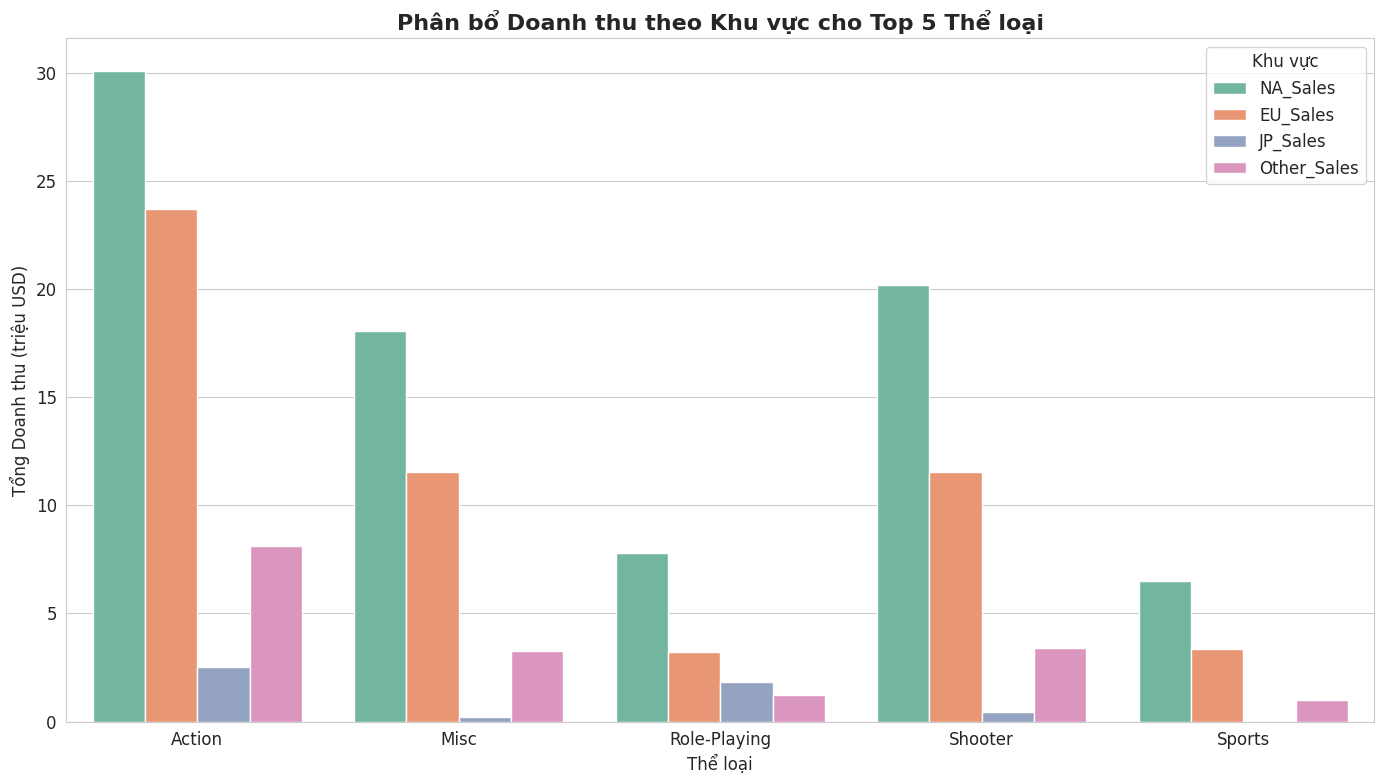

Đang vẽ Biểu đồ 6: Phân bổ Xếp hạng (Rating)...


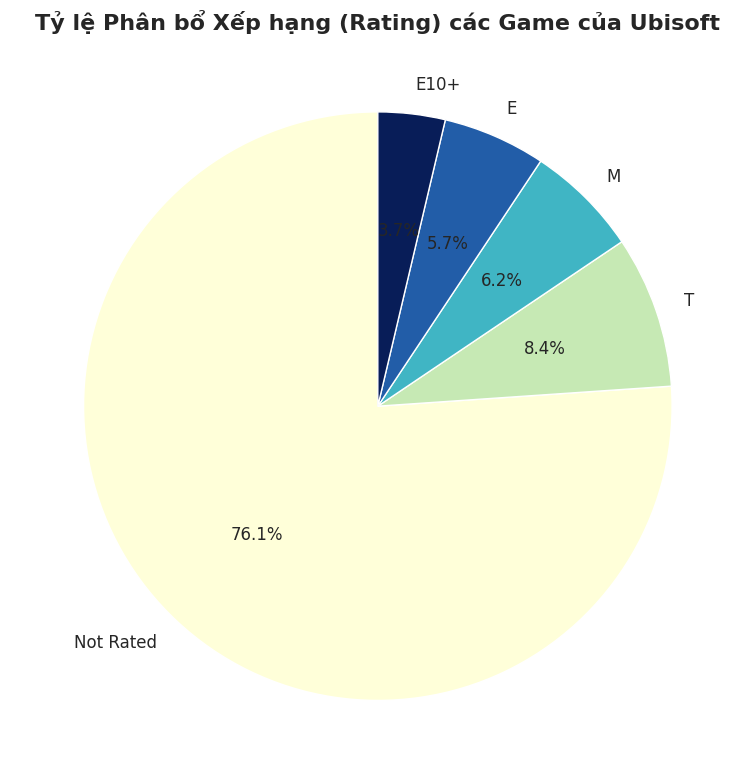

Đang vẽ Biểu đồ 7: Top 10 Nền tảng...


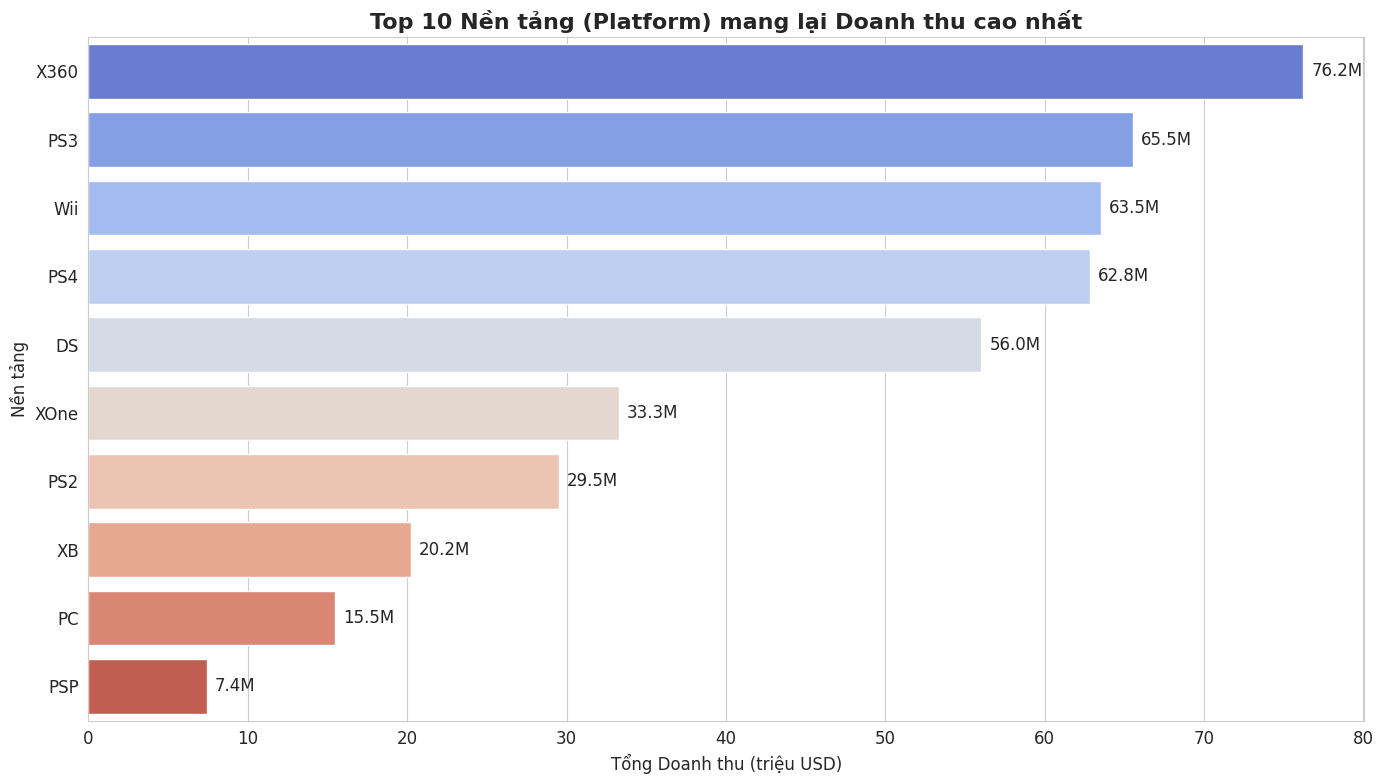

--- HOÀN THÀNH KHỐI 6 ---


In [ ]:
# TRỰC QUAN HÓA (EDA) - BIỂU ĐỒ 5, 6 & 7 (Dùng df_final)

# Kiểm tra xem df_final có tồn tại không
if 'df_final' not in locals():
    print("LỖI: Không tìm thấy DataFrame 'df_final'.")

else:
    # --- Biểu đồ 5: Phân bổ Doanh thu theo Khu vực (Cho Top 5 Thể loại) ---
    print("Đang vẽ Biểu đồ 5: Phân bổ Doanh thu Khu vực...")

    # Lấy lại top 5 thể loại (đã tính ở Khối 4)
    sales_by_genre = df_final.groupby('Genre')['Global_Sales'].sum().reset_index()
    top_5_genre_names = sales_by_genre.sort_values(by='Global_Sales', ascending=False).head(5)['Genre'].tolist()

    # Lọc df_final chỉ chứa top 5 thể loại này
    df_top5_genre = df_final[df_final['Genre'].isin(top_5_genre_names)]

    # Gom nhóm doanh thu theo khu vực
    df_region = df_top5_genre.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

    # "Tan chảy" (Melt) DataFrame để phù hợp cho stacked bar plot
    df_region_melted = df_region.melt(id_vars='Genre', var_name='Region', value_name='Sales')

    plt.figure(figsize=(14, 8))
    ax5 = sns.barplot(data=df_region_melted, x='Genre', y='Sales', hue='Region', palette='Set2')
    ax5.set_title('Phân bổ Doanh thu theo Khu vực cho Top 5 Thể loại', fontsize=16, fontweight='bold')
    ax5.set_xlabel('Thể loại')
    ax5.set_ylabel('Tổng Doanh thu (triệu USD)')
    ax5.legend(title='Khu vực')
    plt.tight_layout()
    plt.show()

    # --- Biểu đồ 6: Phân bổ Xếp hạng Game (Rating) ---
    print("Đang vẽ Biểu đồ 6: Phân bổ Xếp hạng (Rating)...")
    plt.figure(figsize=(10, 8))

    # Đếm số lượng game theo từng loại Rating
    rating_counts = df_final['Rating'].value_counts()

    # Vẽ biểu đồ tròn (Pie chart)
    ax6 = rating_counts.plot(kind='pie',
                             autopct='%1.1f%%', # Hiển thị %
                             startangle=90,
                             cmap='YlGnBu',
                             fontsize=12)
    ax6.set_title('Tỷ lệ Phân bổ Xếp hạng (Rating) các Game của Ubisoft', fontsize=16, fontweight='bold')
    ax6.set_ylabel('') # Bỏ nhãn trục Y
    plt.tight_layout()
    plt.show()

    # --- Biểu đồ 7: Top 10 Nền tảng (Platform) có Doanh thu cao nhất ---
    print("Đang vẽ Biểu đồ 7: Top 10 Nền tảng...")
    plt.figure(figsize=(14, 8))

    # Gom nhóm theo Platform, tính tổng doanh thu và sắp xếp
    sales_by_platform = df_final.groupby('Platform')['Global_Sales'].sum().reset_index()
    top_10_platforms = sales_by_platform.sort_values(by='Global_Sales', ascending=False).head(10)

    ax7 = sns.barplot(data=top_10_platforms, x='Global_Sales', y='Platform', palette='coolwarm')
    ax7.set_title('Top 10 Nền tảng (Platform) mang lại Doanh thu cao nhất', fontsize=16, fontweight='bold')
    ax7.set_xlabel('Tổng Doanh thu (triệu USD)')
    ax7.set_ylabel('Nền tảng')

    # Thêm nhãn giá trị
    for p in ax7.patches:
        width = p.get_width()
        ax7.text(width + 0.5, # Vị trí X
                 p.get_y() + p.get_height() / 2, # Vị trí Y
                 f'{width:.1f}M', # Nội dung text
                 va='center')

    plt.tight_layout()
    plt.show()

    print("--- HOÀN THÀNH KHỐI 6 ---")

# **MODEL**



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import os

from google.colab import drive
drive.mount('/content/drive')

# TẢI DỮ LIỆU
drive_folder_path = '/content/drive/MyDrive/BI_Ubisoft_Data'
file_path = os.path.join(drive_folder_path, 'Tagged-Data-Final.csv')

try:
    df_full = pd.read_csv(file_path)
    print(f"Đã tải thành công file '{os.path.basename(file_path)}'")
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file '{file_path}'. Vui lòng kiểm tra lại đường dẫn.")
    # Dừng nếu không có file
    raise SystemExit("Dừng thực thi.")

# LỌC VÀ CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH

# Lọc các bản ghi của Ubisoft
df_ubisoft = df_full[df_full['Publisher'].astype(str).str.contains('Ubisoft', case=False, na=False)].copy()
print(f"Đã lọc được {len(df_ubisoft)} bản ghi của Ubisoft.")

# Chọn các cột cần thiết cho mô hình
model_data = df_ubisoft[['Global_Sales', 'Critic_Score', 'User_Score']].copy()

# Xử lý dữ liệu thiếu: Loại bỏ bất kỳ hàng nào thiếu 1 trong 3 giá trị
# (Vì mô hình hồi quy không thể xử lý giá trị NaN)
rows_before = len(model_data)
model_data.dropna(subset=['Global_Sales', 'Critic_Score', 'User_Score'], inplace=True)
rows_after = len(model_data)

print(f"Đã loại bỏ {rows_before - rows_after} hàng bị thiếu dữ liệu (NaN) trong các cột mô hình.")
print(f"Số lượng bản ghi sẵn sàng để huấn luyện mô hình: {rows_after}")

print("\n5 hàng đầu của dữ liệu mô hình:")
print(model_data.head())

Mounted at /content/drive
Đã tải thành công file 'Tagged-Data-Final.csv'
Đã lọc được 510 bản ghi của Ubisoft.
Đã loại bỏ 0 hàng bị thiếu dữ liệu (NaN) trong các cột mô hình.
Số lượng bản ghi sẵn sàng để huấn luyện mô hình: 510

5 hàng đầu của dữ liệu mô hình:
     Global_Sales  Critic_Score  User_Score
17           0.15          52.0         6.8
18           0.06          51.0         6.9
48           0.12          64.0         6.8
155          0.25          70.0         7.4
156          0.08          43.0         6.7


In [2]:
# XÁC ĐỊNH BIẾN (FEATURES) VÀ MỤC TIÊU (TARGET)

# Features (X): Các biến độc lập (dùng để dự đoán)
X = model_data[['Critic_Score', 'User_Score']]

# Target (y): Biến phụ thuộc (cần dự đoán)
y = model_data['Global_Sales']

# 5. CHIA DỮ LIỆU (TRAIN/TEST SPLIT)
# Chia 80% để train, 20% để test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nKích thước tập Train: {len(X_train)} bản ghi")
print(f"Kích thước tập Test: {len(X_test)} bản ghi")

# TRAINING
# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình với dữ liệu Training
model.fit(X_train, y_train)

print("\n Đã huấn luyện thành công mô hình Linear Regression!")


Kích thước tập Train: 408 bản ghi
Kích thước tập Test: 102 bản ghi

 Đã huấn luyện thành công mô hình Linear Regression!


In [3]:
# ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST

# Dự đoán trên dữ liệu Test
y_pred = model.predict(X_test)

# Tính toán R-squared (Hệ số xác định)
# R-squared cho biết mô hình giải thích được bao nhiêu % sự biến động của Doanh số
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Lỗi bình phương trung bình

print("\n--- KẾT QUẢ VÀ ĐÁNH GIÁ MÔ HÌNH (BƯỚC 4) ---")
print(f"\n📈 R-squared (Hệ số xác định): {r2:.4f}")
print(f"   (Lỗi Bình phương Trung bình - MSE): {mse:.4f}")

if r2 > 0.5:
    print(f"   -> Đánh giá: Mô hình giải thích được khoảng {r2*100:.1f}% sự biến động của 'Global_Sales'. Mức độ ảnh hưởng TỐT.")
elif r2 > 0.2:
     print(f"   -> Đánh giá: Mô hình giải thích được khoảng {r2*100:.1f}% sự biến động của 'Global_Sales'. Mức độ ảnh hưởng TRUNG BÌNH.")
else:
     print(f"   -> Đánh giá: Mô hình giải thích được khoảng {r2*100:.1f}% sự biến động của 'Global_Sales'. Điểm số có ảnh hưởng THẤP đến doanh số.")


# DIỄN GIẢI KẾT QUẢ (NHẬN XÉT MÔ HÌNH)

# Lấy các hệ số (coefficients) của mô hình
intercept = model.intercept_
coef_critic = model.coef_[0]
coef_user = model.coef_[1]

print("\n Diễn giải Hệ số (Coefficients):")
print(f"   - Hệ số chặn (Intercept): {intercept:.4f}")
print(f"   - Hệ số của Critic_Score (thang 100): {coef_critic:.4f}")
print(f"   - Hệ số của User_Score (thang 10): {coef_user:.4f}")

print("\n HÀM Ý QUẢN LÝ TỪ MÔ HÌNH:")
print(f"   - Cứ mỗi 1 điểm Critic_Score tăng lên (giữ nguyên User_Score), Global_Sales (triệu bản) dự kiến sẽ {'tăng' if coef_critic > 0 else 'giảm'} {abs(coef_critic):.4f}.")
print(f"   - Cứ mỗi 1 điểm User_Score tăng lên (giữ nguyên Critic_Score), Global_Sales (triệu bản) dự kiến sẽ {'tăng' if coef_user > 0 else 'giảm'} {abs(coef_user):.4f}.")

if abs(coef_critic) > abs(coef_user):
    print("\n   -> KẾT LUẬN: Điểm số của Nhà phê bình (Critic_Score) có ảnh hưởng LỚN HƠN đến doanh số bán hàng so với điểm của Người dùng (User_Score).")
else:
     print("\n   -> KẾT LUẬN: Điểm số của Người dùng (User_Score) có ảnh hưởng LỚN HƠN đến doanh số bán hàng so với điểm của Nhà phê bình (Critic_Score).")


--- KẾT QUẢ VÀ ĐÁNH GIÁ MÔ HÌNH (BƯỚC 4) ---

📈 R-squared (Hệ số xác định): 0.1035
   (Lỗi Bình phương Trung bình - MSE): 0.3460
   -> Đánh giá: Mô hình giải thích được khoảng 10.4% sự biến động của 'Global_Sales'. Điểm số có ảnh hưởng THẤP đến doanh số.

 Diễn giải Hệ số (Coefficients):
   - Hệ số chặn (Intercept): -0.7833
   - Hệ số của Critic_Score (thang 100): 0.0265
   - Hệ số của User_Score (thang 10): -0.0482

 HÀM Ý QUẢN LÝ TỪ MÔ HÌNH:
   - Cứ mỗi 1 điểm Critic_Score tăng lên (giữ nguyên User_Score), Global_Sales (triệu bản) dự kiến sẽ tăng 0.0265.
   - Cứ mỗi 1 điểm User_Score tăng lên (giữ nguyên Critic_Score), Global_Sales (triệu bản) dự kiến sẽ giảm 0.0482.

   -> KẾT LUẬN: Điểm số của Người dùng (User_Score) có ảnh hưởng LỚN HƠN đến doanh số bán hàng so với điểm của Nhà phê bình (Critic_Score).
